<a href="https://www.kaggle.com/code/paradkardivya/titanic-ml-prediction-model?scriptVersionId=187793608" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival Prediction 
## - Machine Learning Model

 **To predict the survival chances of the Titanic passengers using data.**

**RMS Titanic sank on 15 April 1912 in the North Atlantic Ocean. The largest ocean liner in service at the time, Titanic was four days into her maiden voyage from Southampton to New York City, with an estimated 2,224 people on board when she struck an iceberg at 23:40 (ship's time)[a] on 14 April. Her sinking two hours and forty minutes later at 02:20 ship's time (05:18 GMT) on 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.**


## Data Pre-Processing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (5,4)
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Cleaning

In [6]:
df_train.drop_duplicates(keep='first',inplace=True)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Visualization

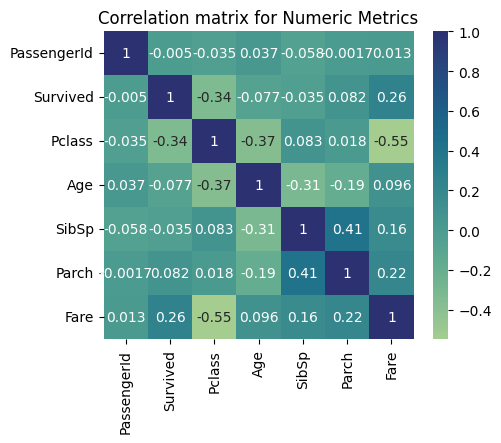

In [8]:
correlation_matrix = df_train.corr(numeric_only=True, method = 'pearson')
sns.heatmap(correlation_matrix, annot= True, cmap="crest")

plt.title("Correlation matrix for Numeric Metrics")

plt.show()

In [9]:
df_train_cat = df_train[['Age', 'Sex', 'SibSp', 'Parch', 'Fare']]
df_train_cat.head()

,Age,Sex,SibSp,Parch,Fare
0,22.0,male,1,0,7.2500
1,38.0,female,1,0,71.2833
2,26.0,female,0,0,7.9250
3,35.0,female,1,0,53.1000
4,35.0,male,0,0,8.0500


In [10]:
pd.pivot_table(df_train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [11]:
# Embarked
df_train.fillna({'Embarked': 'S'}, inplace=True)


In [12]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping) 
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping) 

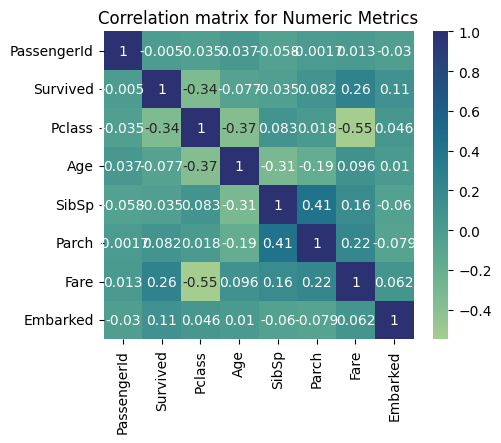

In [13]:
correlation_matrix = df_train.corr(numeric_only=True, method = 'pearson')
sns.heatmap(correlation_matrix, annot= True, cmap="crest")

plt.title("Correlation matrix for Numeric Metrics")

plt.show()

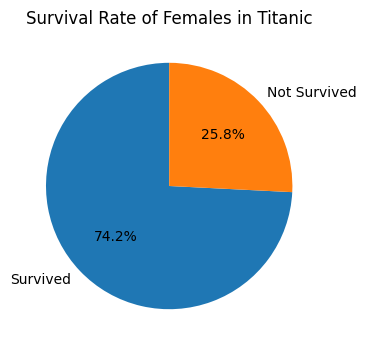

In [14]:
women = df_train.loc[df_train.Sex == 'female']

# Count survivors and non-survivors among females
survived_count = women[women['Survived'] == 1].shape[0]
not_survived_count = women[women['Survived'] == 0].shape[0]

# Calculate survival rate among females
total_women = len(women)
survival_rate = survived_count / total_women * 100.0

plt.pie([survived_count, not_survived_count], labels=["Survived", "Not Survived"], autopct="%1.1f%%", startangle=90)
plt.title("Survival Rate of Females in Titanic")
plt.show()



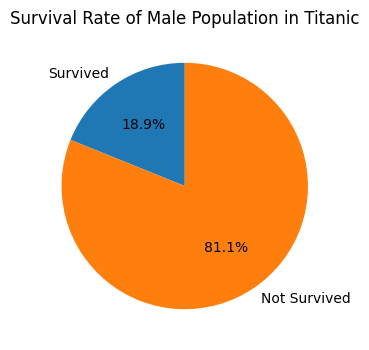

In [15]:
men = df_train.loc[df_train.Sex == 'male']
survived_count_men = men[men['Survived'] == 1].shape[0]
not_survived_count_men = men[men['Survived'] == 0].shape[0]

# Calculate survival rate among females
total_men = len(men)
survival_rate_men = survived_count_men / total_men * 100.0

plt.pie([survived_count_men, not_survived_count_men], labels=["Survived", "Not Survived"], autopct="%1.1f%%", startangle=90)
plt.title("Survival Rate of Male Population in Titanic")
plt.show()

## Feature Engineering

In [16]:
sex_mapping = {"male": 0, "female": 1} 
df_train['Sex'] = df_train['Sex'].map(sex_mapping) 
df_test['Sex'] = df_test['Sex'].map(sex_mapping) 

In [17]:
df = [df_train, df_test] 
for dataset in df:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df_train['Title'], df_train['Sex']) 

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [18]:
for dataset in df: 
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                'Upper_Class') 
  
    dataset['Title'] = dataset['Title'].replace( 
        ['Countess', 'Lady', 'Sir'], 'Royal') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
  
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 
  
# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Royal": 5, "Upper_Class": 6} 
for dataset in df: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 
    dataset['Title'] = dataset['Title'].fillna(0)

In [19]:
df_train["Age"] = df_train["Age"].fillna(-0.5) 
df_test["Age"] = df_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior'] 
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels=labels) 
df_test['AgeGroup'] = pd.cut(df_test["Age"], bins, labels=labels)

In [20]:
Mr_age = df_train[df_train["Title"] == 1]["AgeGroup"].mode()
Miss_age = df_train[df_train["Title"] == 2]["AgeGroup"].mode()
Mrs_age = df_train[df_train["Title"] == 3]["AgeGroup"].mode()
Master_age = df_train[df_train["Title"] == 4]["AgeGroup"].mode()
Royal_age = df_train[df_train["Title"] == 5]["AgeGroup"].mode()  
Upper_Class_age = df_train[df_train["Title"] == 6]["AgeGroup"].mode()  
  
age_title_mapping = {1: "Young Adult", 2: "Young Adult", 
                     3: "Adult", 4: "Child", 5: "Adult", 6: "Adult"} 
  
for x in range(len(df_train["AgeGroup"])): 
    if df_train["AgeGroup"][x] == "Unknown": 
        df_train["AgeGroup"][x] = age_title_mapping[df_train["Title"][x]] 
  
for x in range(len(df_test["AgeGroup"])): 
    if df_test["AgeGroup"][x] == "Unknown": 
        df_test["AgeGroup"][x] = age_title_mapping[df_test["Title"][x]] 

In [21]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
               'Student': 4, 'Young Adult': 5, 'Adult': 6,  
               'Senior': 7} 
df_train['AgeGroup'] = df_train['AgeGroup'].map(age_mapping) 
df_test['AgeGroup'] = df_test['AgeGroup'].map(age_mapping) 

  

In [22]:
for x in range(len(df_test["Fare"])): 
    if pd.isnull(df_test["Fare"][x]): 
        pclass = df_test["Pclass"][x] 
        df_test["Fare"][x] = round( 
            df_train[df_train["Pclass"] == pclass]["Fare"].mean(), 4) 
  
# map Fare values into groups of  
# numerical values 
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4,  
                            labels=[1, 2, 3, 4]) 
df_test['FareBand'] = pd.qcut(df_test['Fare'], 4,  
                           labels=[1, 2, 3, 4]) 

In [23]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in df:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [24]:
col_drop = ['Fare', 'Ticket', 'Name', 'Cabin', 'Age', 'SibSp', 'Parch' ]
df_train = df_train.drop(col_drop, axis=1) 
df_test = df_test.drop(col_drop, axis=1) 

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,AgeGroup,FareBand,FamilySize
0,1,0,3,0,1,1,4.0,1,0.4
1,2,1,1,1,2,3,6.0,4,0.4
2,3,1,3,1,1,2,5.0,2,0.0
3,4,1,1,1,1,3,5.0,4,0.4
4,5,0,3,0,1,1,5.0,2,0.0


## Model Training

In [26]:
from sklearn.model_selection import train_test_split 
predictors = df_train.drop(['Survived', 'PassengerId'], axis=1) 
target = df_train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.2, random_state=0) 

In [27]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
  
randomforest = RandomForestClassifier() 
  
# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 
  
# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 

82.68


In [28]:
ids = df_test['PassengerId'] 
predictions = randomforest.predict(df_test.drop('PassengerId', axis=1)) 
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('resultfile.csv', index=False) 

In [29]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
